In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Q4: Plot data of measured fan blade vibration against model (a)

In [13]:
# Array of frequencies f (Hz), and response amplitude Y (mm)
f = np.array([0, 14, 16, 18, 20, 22, 24, 26])
Y = np.array([0.1, 0.19, 0.24, 0.34, 0.4, 0.29, 0.19, 0.13])
print(f, Y)

[ 0 14 16 18 20 22 24 26] [0.1  0.19 0.24 0.34 0.4  0.29 0.19 0.13]


### Formula from Data Book pg 8
$$
Y = \frac{X}{\sqrt{(1 - \Omega^2)^2 + (2 \zeta \Omega^2)^2}}
$$

where $ \Omega = \frac{\omega}{\omega_n} $

In [14]:
f_theory = np.linspace(0, 30, 100)
# print(f_theory)

X = 0.1 # mm
zeta = 0.125
omega_r = 2 * np.pi * 20 # f_resonant = 20
omega_n = omega_r / np.sqrt((1 - 2 * (zeta)**2)) # rad/s
Omega = f_theory * 2 * np.pi / omega_n
Y_theory = X / np.sqrt( (1 - Omega**2)**2 + (2 * zeta * Omega**2)**2 )
# print(Y_theory)
print(f"Omege_r: {omega_r}\nOmega_n: {omega_n}")

Omege_r: 125.66370614359172
Omega_n: 127.67445311640614


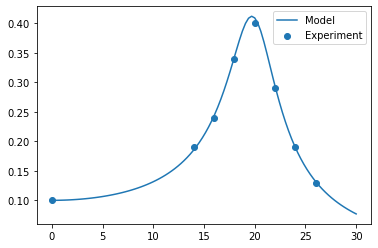

In [26]:
plt.plot(f_theory, Y_theory, 'r-', label='Model')
plt.scatter(f, Y, label='Experiment')
plt.legend()
plt.show()
# NOTE: this graph is slightly different than ex graph, due to omega_n "error"

## Q10: Plot Impulse response of 2nd order response (DB pg 7)

$$
\frac{y}{\omega_n N} = \frac{\exp(- \zeta \omega_n t) \sin(\omega_d t)}{\sqrt{1 - \zeta ^ 2}}
\approx {\exp(- \zeta \omega_n t) \sin(\omega_n t)}
$$

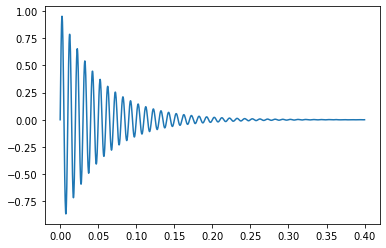

In [8]:
dt = 0.0003
t = np.arange(0, 0.4, dt)
omega_n = 100 * 2 * np.pi
zeta = 0.03
# Plotting normalised value y/omega_n (N = 1)
y = np.exp(- zeta * omega_n * t) * np.sin(omega_n * t)
plt.plot(t, y)
plt.show()

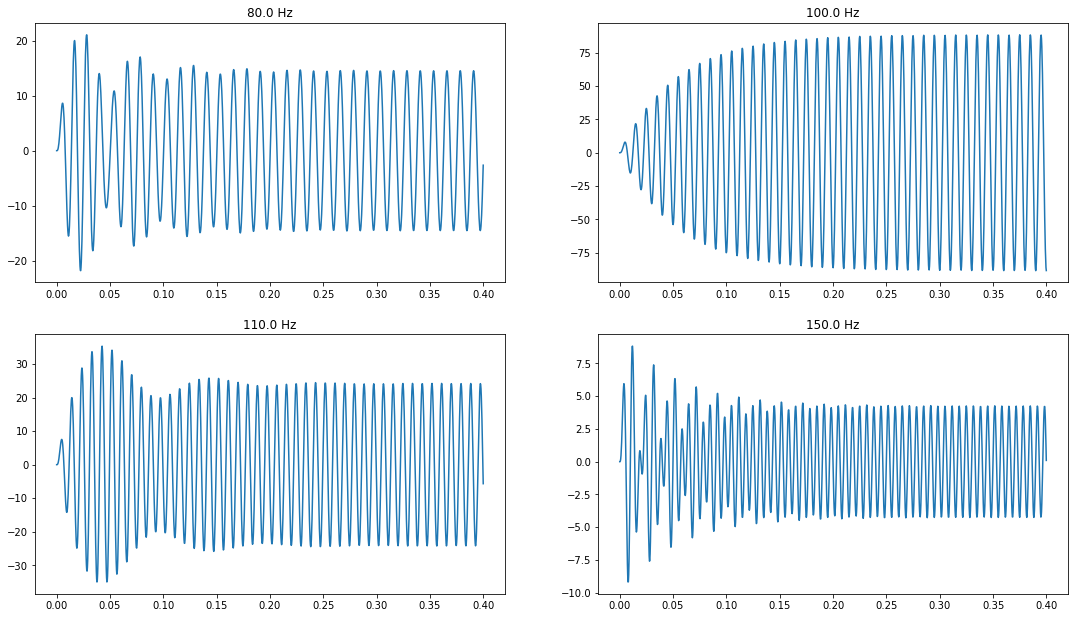

In [12]:
# Vector of sin functions with freq: 80, 100, 110, 150


sinf = lambda f: np.sin(2 * np.pi * f * t)
f_arr = np.array([80.0, 100.0, 110.0, 150.0])

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for f,ax in zip(f_arr, axs.flat):
    # print(sinf(f))
    conv = np.convolve(y, sinf(f)) # WHY does ex multiply by dt?
    ax.plot(t, conv[:len(t)])
    ax.set_title(f'{f} Hz')

plt.show()